Importing the Dependencies

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




Data Collection and Processing

In [170]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heart_disease_data.csv')

In [171]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [172]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [173]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [174]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [175]:
# checking for missing values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [176]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [177]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

,count
target,
1,165
0,138


1 --> Defective Heart

0 --> Healthy Heart

In [178]:
heart_data.drop(['fbs', 'chol', 'restecg', 'age'], axis=1, inplace=True)

Splitting the Features and Target

In [179]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

<Axes: >

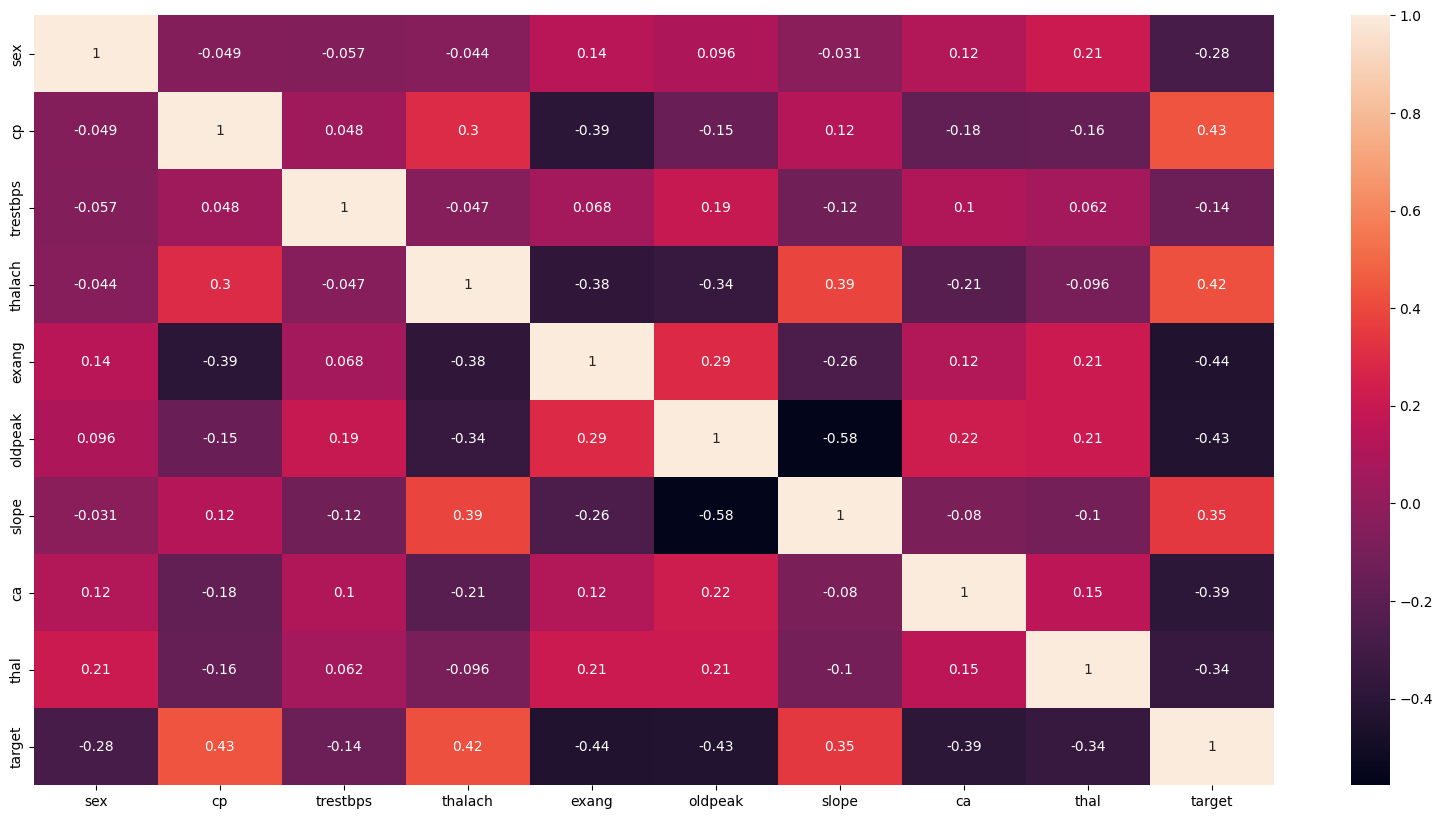

In [180]:
plt.figure(figsize=(20,10))
sns.heatmap(heart_data.corr(),annot=True)

Splitting the Data into Training data & Test Data

In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [182]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Training

Model Evaluation

In [183]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.linear_model import LogisticRegression as LC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as NB


from sklearn.metrics import accuracy_score as acc


## Beginning Model Training
models = [LC(), KNC(n_neighbors=15 ) , DTC(),RFC() ,SVC(),NB()]


for model in models:
    model.fit(X_train, Y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    acc_train = acc(Y_train, y_train_pred)
    acc_test = acc(Y_test, y_test_pred)


    print(type(model).__name__)

    print('Model performance for Training set')
    print("- Accuracy Score:", acc_train)

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy Score:", acc_test)

    print('='*35)
    print('\n')

LogisticRegression
Model performance for Training set
- Accuracy Score: 0.8636363636363636
----------------------------------
Model performance for Test set
- Accuracy Score: 0.819672131147541


KNeighborsClassifier
Model performance for Training set
- Accuracy Score: 0.859504132231405
----------------------------------
Model performance for Test set
- Accuracy Score: 0.8032786885245902


DecisionTreeClassifier
Model performance for Training set
- Accuracy Score: 1.0
----------------------------------
Model performance for Test set
- Accuracy Score: 0.7540983606557377


RandomForestClassifier
Model performance for Training set
- Accuracy Score: 1.0
----------------------------------
Model performance for Test set
- Accuracy Score: 0.8360655737704918


SVC
Model performance for Training set
- Accuracy Score: 0.8966942148760331
----------------------------------
Model performance for Test set
- Accuracy Score: 0.8360655737704918


GaussianNB
Model performance for Training set
- Accuracy 

In [184]:
#Initialize few parameter for Hyperparamter tuning
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}


In [185]:
##Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
random = GridSearchCV(estimator=RFC(),param_grid=rf_params,cv=3,verbose=2,n_jobs=-1)

random.fit(X_train, Y_train)

print(f"---------------- Best Params -------------------")
print(random.best_params_)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


KeyboardInterrupt: 

In [186]:
rfc = RFC(n_estimators= 500, min_samples_split= 20, max_features= 5, max_depth = 15)
rfc.fit(X_train, Y_train) # Train model

# Make predictions
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

# Evaluate Train and Test dataset
acc_train = acc(Y_train, y_train_pred)
acc_test = acc(Y_test, y_test_pred)

print(type(rfc).__name__)
print('Model performance for Training set')
print("- Accuracy Score:", acc_train)
print('----------------------------------')
print('Model performance for Test set')
print("- Accuracy Score:", acc_test)
print('='*35)
print('\n')

RandomForestClassifier
Model performance for Training set
- Accuracy Score: 0.8966942148760331
----------------------------------
Model performance for Test set
- Accuracy Score: 0.8688524590163934




## Save Model

In [187]:
import pickle
filename = 'heart_disease_model.sav'
pickle.dump(rfc, open(filename, 'wb'))